## Домашнее задание 2, методы одномерной оптимизации
### Deadline - 27.09.2024

# Основная часть

__Определение__ Одномерная функция $f: [a,b] \to \mathbb{R}$ называется унимодальной на отрезке $[a,b]$, если существует $c^* \in [a,b]$ такое, что

1) для любых $a \leq x < y \leq c^*$ имеем $f(x) > f(y)$,

2) для любых $c^* \leq x < y \leq b$ имеем $f(x) < f(y)$.

В этом задании будем минимизировать такого рода функции.

__Задача 1. (всего 5 баллов)__ Рассмотрим метод дихотомии:

```python
def binpoisk(f, a, b, eps):
    '''
        f - целевая унимодальная на [a, b] функция
        a, b - концы отрезка
        eps - требуемая точность найденного решения,
            т.е. возвращаемое c должно быть таким, что abs(c - c*) <= eps
        
        Функция возвращает найденное с точностью eps точку минимума
    '''
    c = (a + b) / 2
    while (b - a) > eps:
        d = (a + c) / 2
        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2
            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e
    return c
```

__а). (1 балла)__ Докажите корректность для нахождения минимума унимодальной функции.

Докажем инвариант алгоритма: $c, \ c^* \in [a, b]$, и за один шаг алгоритма длина отрезка $[a, b]$ уменьшается на $2$.


Проведем доказательство, используя метод математической индукции:

- (База) До начала работы алгоритма $c^* \in [a, b]$.

- (Переход) По предположению индукции получаем, что $c^* \in [a, b]$.

    Введем новые переменные $c = (a + b)/2, \ d = (a + c)/2, \ e = (c + b)/2$.

    1. (1 случай) $ \ c, \ c^* \in [a, d]$.
    
        Тогда $f(d) < f(c) \Rightarrow b_{new} = c, \ c_{new} = d$.

        Все инварианты сохранились: $c, \ c^* \in [a_{new}, b_{new}]$, а также длина отрезка $[a, b]$ уменьшилась на $2$. 

    2. (2 случай)  $ \ c, \ c^* \in [d, c]$.
        Если $f(d) < f(c)$, мы заходим в первый if, $[d, c] \subset [a, c] = [a_{new}, b_{new}]$.

        Если $f(d) \geq f(c)$, мы не заходим в первый if, но заходим во второй if, в силу $f(d) \leq f(c)$.

        Тогда получаем $a_{new} = d, \ b_{new} = e \Rightarrow [a_{new}, b_{new}] = [d, e] \Rightarrow c, \ c^* \in [a_{new}, b_{new}]$.
    
        Также длина отрезка $[a, b]$ уменьшилась на $2$.

    3. (3 случай) $ \ c, \ c^* \in [c, e]$.

        Тогда $f(d) > f(c) \Rightarrow$ мы пропускаем первый if.

        Если $f(c) \leq f(e) \Rightarrow [a_{new}, b_{new}] = [d, e] \Rightarrow c, \ c^* \in [a_{new}, b_{new}]$, и длина отрезка $[a, b]$ уменьшилась на $2$.

        Если $f(c) > f(e) \Rightarrow$ мы не заходим и во второй if $\Rightarrow [a_{new}, b_{new}] = [c, b] \Rightarrow c, \ c^* \in [a_{new}, b_  {new}]$, и длина отрезка $[a, b]$ уменьшилась на $2$.

    4. (4 случай) $ \ c, \ c^* \in [e, b]$.
    
        Тогда $f(d) > f(c)$ и $f(c) > f(e) \Rightarrow$ мы пропускаем первый и второй if.

        Тогда $[a_{new}, b_{new}] = [c, b] \Rightarrow c, \ c^* \in [a_{new}, b_{new}]$, и длина отрезка $[a, b]$ уменьшилась на $2$.


В силу того, что всегда $c, \ c^* \in [a, b]$, и также длина отрезка $[a, b]$ уменьшается каждый раз на $2$, существует такой шаг алгоритма, что $|c - c^*| < \varepsilon$, что и доказывает корректность алгоритма.

__б). (1.5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)? Необходимо получить верхнюю оценку на число итераций и подсчета значений $f$ метода дихотомии для минимизации унимодальных функций.

Поскольку на каждой итерации длина текущего интервала уменьшается в два раза, а также найти минимум с точностью $\varepsilon$, то общее количество шагов цикла не превысит $\log_2 \frac{b - a}{\varepsilon}$. При этом на каждой итерации необходимо вызвать оракул нулевого порядка не более 4 раз, следовательно, понадобится выполнить $4 \cdot \log_2 \frac{b - a}{\varepsilon}$ вызовов оракула 0 порядка.

__г). (0.5 балла)__ Придумайте свою унимодальную функцию (постарайтесь придумать не самый тривиальный пример, если совсем не получается обратите внимание на функцию $f(x) = \sin x \cdot e^x$ и модернизируйте ее). Покажите, что она является унимодальной на каком-то отрезке. Где у нее находится $c^*$?

Пример унимодальной функции:

- $f(x) = - x^2 \cdot e^{-x}, \quad x \in [0, 100]$

Докажем, что функция унимодальна на отрезке $[0, 100]$. Для этого найдем производную $f'(x)$ и исследуем знак производной, чтобы убедиться, что функция сначала убывает, а затем возрастает.

Найдем производную функции:

- $f'(x) = \frac{d}{dx}(-x^2 \cdot e^{-x}) = -2x \cdot e^{-x} + x^2 \cdot e^{-x} = e^{-x}(x^2 - 2x)$

Найдем критические точки, приравняв $f'(x)$ к нулю:

- $e^{-x}(x^2 - 2x) = 0$

- Так как $e^{-x} \neq 0$ для всех $x$, решаем уравнение:

- $x^2 - 2x = 0$

Решаем квадратное уравнение:

- $x(x - 2) = 0 \quad \Rightarrow \quad x = 0 \quad \text{или} \quad x = 2$

Таким образом, критическая точка $x = 2$.

Теперь исследуем знак производной на интервалах $[0, 2]$ и $[2, 100]$:
- На интервале $[0, 2]$: $f'(x) > 0$ (функция убывает).
- На интервале $[2, 100]$: $f'(x) < 0$ (функция возрастает).

Следовательно, функция сначала убывает на $[0, 2]$, достигает минимума в точке $x = 2$, а затем возрастает на $[2, 100]$. Это доказывает, что функция унимодальна на отрезке $[0, 100]$, и точка $c^*$, где функция достигает минимума, находится в $x = 2$.

__д). (2 балла)__ Реализуйте и запустите для этой функции метод дихотомии. Постройте 2 графика сходимости:

1) по оси абцисс - число итераций, по оси ординат - $|c_{out} - c^*|$,

2) по оси абцисс - число оракульных вызовов $f$, по оси ординат - $|c_{out} - c^*|$.

Нанесите на оба графика теоретическую оценку из пункта 1.б) основной части.

Следите за оформлением графиков: размер графика, масштаб осей (обычный или логарифмический), подписи осей (в том числе размер), легенда (так как на каждом графике будет две линии), толщина линий и т.д.. Графики должны быть удобны для чтения.

Импорт нужных библиотек 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sps
import seaborn as sns
import math 

sns.set(style='darkgrid')
%matplotlib inline

Реализация метода дихотомии

In [2]:
def dichotomy_method(f, a, b, eps, true_min):
    """
    Реализация метода дихотомии для нахождения минимума унимодальной функции.

    Параметры:
    ----------
    f : функция
        Целевая унимодальная функция, минимум которой необходимо найти на отрезке [a, b].
    a, b : float
        Начальные границы отрезка поиска минимума.
    eps : float
        Требуемая точность решения. Процесс поиска продолжается до тех пор,
        пока длина отрезка не станет меньше eps.
    true_min : float
        Точное значение минимума функции (c*) для вычисления ошибки.

    Возвращает:
    ----------
    c_list : list of floats
        Список всех промежуточных значений c, рассмотренных в процессе поиска.
    oracle_call_list : list of ints
        Список с количеством вызовов оракула (вычисления функции) на каждом шаге.
    abs_error_list : list of floats
        Список ошибок |c - c*| для каждого промежуточного значения c, где c* — истинный минимум функции.
    """
    c = (a + b) / 2

    oracle_call_count = 0
    c_list = [c]  # Список для хранения всех промежуточных значений c
    oracle_call_list = [
        oracle_call_count
    ]  # Количество вызовов оракула 0 порядка на данном шаге
    abs_error_list = [abs(true_min - c)]  # Ошибка |c - c*|

    while (b - a) > eps:
        # Увеличиваем счетчик вызовов оракула
        oracle_call_count += 2

        d = (a + c) / 2

        if f(d) <= f(c):
            b = c
            c = d
        else:
            e = (b + c) / 2

            # Увеличиваем счетчик вызовов оракула
            oracle_call_count += 2

            if f(c) <= f(e):
                a = d
                b = e
            else:
                a = c
                c = e

        # Добавляем промежуточные данные для графиков
        c_list.append(c)
        oracle_call_list.append(oracle_call_count)
        abs_error_list.append(abs(c - true_min))

    return c_list, oracle_call_list, abs_error_list

Целевая функция

In [3]:
def unimodal_function(x):
    return -(x)**2 * math.exp(-x)

Фиксируем $a, \ b, \ \varepsilon$ 

In [4]:
a = 0
b = 100
eps = 5e-7

Запустим метод дихотомии

In [5]:
dich_c, dich_oracle_call, dich_abs_error = dichotomy_method(
    unimodal_function, a, b, eps, 2
)

Теоретическая оценка:

число итерации = $\log_2{\frac{b - a}{\varepsilon}}$

$\varepsilon = (b - a) / {2^{число \ итерации}}$

Визуализация зависимости $|c_{out} - c^*|$ от числа итерации

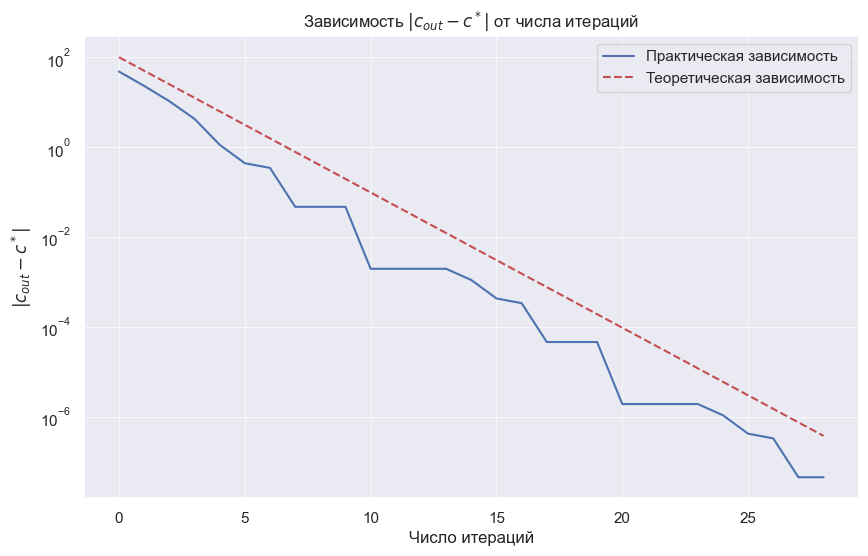

In [6]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 6])

    plt.plot(dich_abs_error, color="b", label="Практическая зависимость")
    plt.plot(
        [(b - a) / (2**i) for i in range(0, len(dich_c))],
        linestyle="--",
        color="r",
        label="Теоретическая зависимость",
    )

    # Установим логарифмическую шкалу по оси Y
    plt.yscale("log")

    plt.xlabel("Число итераций")
    plt.ylabel(r"$|c_{out} - c^*|$")
    plt.title(r"Зависимость $|c_{out} - c^*|$ от числа итераций")

    plt.grid(True, linewidth=0.5)
    plt.legend()
    plt.show()


Метод дихотомии показывает ожидаемую экспоненциальную сходимость, и практическая зависимость ошибки $∣c_{out}−c^∗∣$ достаточно близко соответствует теоретической оценке

Теоретическая оценка:

число вызовов оракула = $4 \cdot \log_2{\frac{b - a}{\varepsilon}}$

$\varepsilon = (b - a) / {2^{\frac{число \ вызывов \ оракула}{4}}}$

Визуализация зависимости $|c_{out} - c^*|$ от числа вызовов оракула 0го порядка

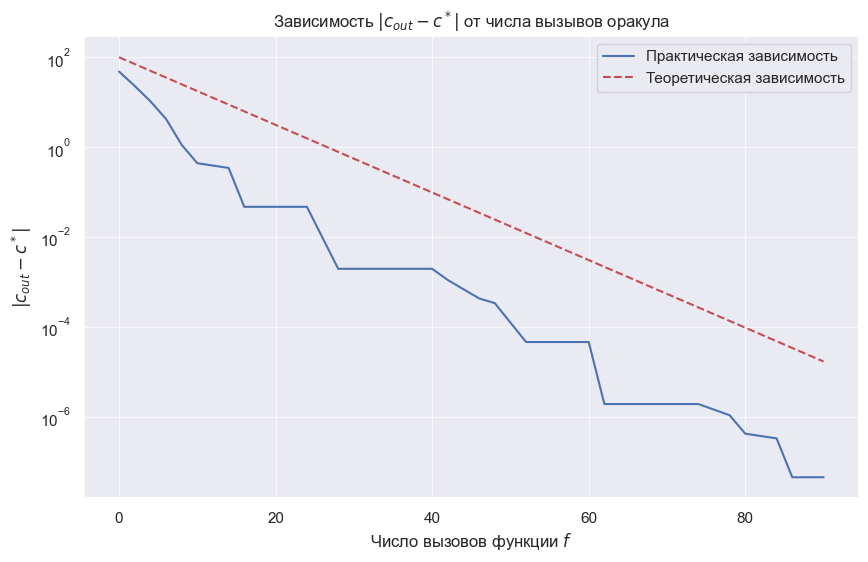

In [7]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 6])

    plt.plot(
        dich_oracle_call, dich_abs_error, color="b", label="Практическая зависимость"
    )
    plt.plot(
        dich_oracle_call,
        [(b - a) / 2 ** (i / 4) for i in dich_oracle_call],
        linestyle="--",
        color="r",
        label="Теоретическая зависимость",
    )

    # Установим логарифмическую шкалу по оси Y
    plt.yscale("log")

    plt.xlabel("Число вызовов функции $f$")
    plt.ylabel(r"$|c_{out} - c^*|$")
    plt.title(r"Зависимость $|c_{out} - c^*|$ от числа вызывов оракула")

    plt.grid(True, linewidth=0.5)
    plt.legend()
    plt.show()

В отличие от первого графика, здесь видно, что практическая сходимость метода дихотомии происходит значительно быстрее, чем предсказывает теоретическая оценка. Это связано с тем, что на каждой трети итераций функция обращается к оракулу только дважды, а не четыре раза, как предполагается в теоретической оценке.

Причина такого поведения заключается в том, что у нас есть три возможных исхода на каждой итерации. В одном из случаев нам не нужно выполнять дополнительные два обращения к оракулу, что сокращает количество вычислений.

Вывод:

- Метод дихотомии является эффективным для поиска минимума унимодальной функции, быстро сходясь к решению с точностью $\varepsilon$.

- Практическая сходимость часто опережает теоретическую оценку за счет уменьшенного числа обращений к оракулу в некоторых итерациях.

# Дополнительная часть

__Задача 2. (всего 5 баллов)__ Рассмотрим метод золотого сечения:

```python
def golden_ration(f, a, b, eps):
    '''
        f - целевая унимодальная на [a, b] функция
        a, b - концы отрезка
        eps - требуемая точность найденного решения,
            т.е. возвращаемое c = (a + b) / 2 должно быть таким, что abs(c - c*) <= eps
        
        Функция возвращает найденное с точностью eps точку минимума
    '''
    tau = (1 + sqrt(5)) / 2
    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t
        if f(d) <= f(c):
            a = c
        else:
            b = d
    return (a + b) / 2
```

__а). (1 балла)__ Докажите корректность и сходимость данного алгоритма для нахождения минимума унимодальной функции.

Докажем инвариант алгоритма: $c^* \in [a, b]$, и за один шаг алгоритма длина отрезка $[a, b]$ уменьшается на $\tau$.

Проведем доказательство, используя метод математической индукции:

- (База) До начала работы алгоритма $c^* \in [a, b]$.

- (Переход) По предположению индукции получаем, что $c^* \in [a, b]$.

    Введем новые переменные $\tau = \frac{1 + \sqrt{5}}{2}, \ c = b - \frac{b - a}{\tau}, \ d = a + \frac{b - a}{\tau}$.

    Заметим, что $c < d$, тогда отрезок разбивается на 3 части: $[a, b] = [a, c] \cup [c, d] \cup [d, b]$.

    1. (1 случай) $c^* \in [a, c]$.

        Тогда $f(d) > f(c) \Rightarrow b_{new} = d$.

        Все инварианты сохранились: $c^* \in [a, c] \subset [a_{new}, b_{new}] = [a, d]$, а также длина отрезка $[a, b]$ уменьшилась на $\tau$.

        $\frac{b - a}{b_{new} - a_{new}} = \frac{b - a}{a + (b - a) / \tau - a} = \tau$.

    2. (2 случай) $c^* \in [d, b]$.

        Тогда $f(d) \leq f(c) \Rightarrow a_{new} = c$.

        Все инварианты сохранились: $c^* \in [d, b] \subset [a_{new}, b_{new}] = [c, b]$, а также длина отрезка $[a, b]$ уменьшилась на $\tau$.

        $\frac{b - a}{b_{new} - a_{new}} = \frac{b - a}{b - b + (b - a) / \tau} = \tau$.

    3. (3 случай) $c^* \in [c, d]$.

        Тут, вне зависимости от исхода сравнения $f(d) \leq f(c)$, получаем, что все инварианты сохраняются.

        $c^* \in [c, d] \subset [a, d], \ [c, b]$.

        Причём $[a_{new}, b_{new}] = [a, d]$ или $[c, b]$.

        Также длина отрезка $[a, b]$ уменьшилась на $\tau$.



В силу того, что всегда $c^* \in [a, b]$, и также длина отрезка $[a, b]$ уменьшается каждый раз на $\tau > 1$, существует такой шаг алгоритма, что $|\frac{b - a}{2} - c^*| < \varepsilon$, что и доказывает корректность алгоритма.

__б). (1.5 баллов)__ Какова будет итерационная и оракульная сложность данного алгоритма для достижения точности $\varepsilon$ (а именно, $|c_{out} - c^*| \leq \varepsilon$)?

Сравнивая полученные оценки сложности с полученными ранее, лучше или хуже данный алгоритм, чем метод дихотомии?

_Hint:_ возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

Возможно ли улучшения псевдокода метода золотого сечения с точки зрения оракульной сложности?

- Да!

В текущей реализации на каждой итерации дважды вызывается функция $f$ для вычисления значений $f(c)$ и $f(d)$. Однако можно оптимизировать вызовы оракула, используя тот факт, что на каждой итерации одна из точек ($c$ или $d$) переходит на новую итерацию, а её значение функции $f$ можно сохранить с предыдущей итерации, вместо того чтобы вычислять заново.

In [8]:
def golden_ration_optimized(f, a, b, eps):
    '''
    f - целевая унимодальная на [a, b] функция
    a, b - концы отрезка
    eps - требуемая точность найденного решения,
        т.е. возвращаемое c = (a + b) / 2 должно быть таким, что abs(c - c*) <= eps

    Функция возвращает найденное с точностью eps точку минимума.
    '''
    tau = (1 + math.sqrt(5)) / 2  # Золотое сечение
    t = (b - a) / tau
    c = b - t
    d = a + t

    fc = f(c)  # Вычисляем f(c) один раз
    fd = f(d)  # Вычисляем f(d) один раз

    while (b - a) > eps:
        if fd <= fc:
            a = c
            c = d
            fc = fd  # Сохраняем старое значение f(d)
            d = a + (b - a) / tau
            fd = f(d)  # Вычисляем только f(d)
        else:
            b = d
            d = c
            fd = fc  # Сохраняем старое значение f(c)
            c = b - (b - a) / tau
            fc = f(c)  # Вычисляем только f(c)

    return (a + b) / 2

**__Итерационная сложность и Оракульная сложность__**:

- Поскольку на каждой итерации длина текущего интервала уменьшается на $\tau$, а также найти минимум с точностью $\varepsilon$, то общее количество шагов цикла не превысит $\log_{\tau} \frac{b - a}{\varepsilon}$. При этом на каждой итерации необходимо вызвать оракул нулевого порядка ровно 1 раз, следовательно, понадобится выполнить $\log_{\tau} \frac{b - a}{\varepsilon}$ вызовов оракула 0 порядка.

**__Сравнение методов__**:

- **Итерационная сложность**:

    _Метод дихотомии_ требует: $\log_{2}{\frac{b - a}{\varepsilon}}$ итераций.

    _Метод золотого сечения_ требует: $\log_{\tau}{\frac{b - a}{\varepsilon}}$ итераций
    
    В пересчете через логарифм по основанию $2$ это $\log_{\tau}{\frac{b - a}{\varepsilon}} = \log_{2}{\frac{b - a}{\varepsilon}} \cdot \log_{\tau}{2}$, тут $\log_{\tau}{2} \approx 1.44$

    Таким образом, метод золотого сечения выполняет примерно на $44\%$ больше итераций по сравнению с методом дихотомии. Это приводит к тому, что итерационная сложность метода золотого сечения больше, чем у метода дихотомии.

- **Оракульная сложность**:

    _Метод дихотомии_ требует $4 \cdot \log_{2}{\frac{b - a}{\varepsilon}}$ вызовов оракула.
    
    _Метод золотого сечения_ требует $\log_{\tau}{\frac{b - a}{\varepsilon}}$ вызовов оракула.
     
    Таким образом, метод золотого сечения выполняет примерно на $178\%$ меньше вызовов оракула, чем метод дихотомии, что делает его эффективнее с точки зрения оракульной сложности.

    На счет $178\%$: $\frac{4 \cdot \log_{2}{\frac{b - a}{\varepsilon}}}{ \log_{2}{\frac{b - a}{\varepsilon}} \cdot \log_{\tau}{2}} = \frac{4}{\log{\tau}{2}} \approx 2.78$    

- **Оракульная сложность с учетом практики**:
 
    _В методе дихотомии_ треть итераций требует 2 вызова оракула, а не 4, что уменьшает его оракульную сложность до $(\frac{2}{3} \cdot 4 + \frac{1}{3} \cdot 2) \cdot \log_{2}{\frac{b - a}{\varepsilon}} = \frac{10}{3} \cdot \log_{2}{\frac{b - a}{\varepsilon}}$

    Сравнив эту сложность с методом золотого сечения $\log_{\tau}{2} \cdot \log_{2}{\frac{b - a}{\varepsilon}}$, можно заключить, что метод золотого сечения остается эффективнее. На практике метод золотого сечения выполняет на $131\%$ меньше вызовов оракула, чем метод дихотомии.

    На счет $131\%$: $\frac{\frac{10}{3} \cdot \log_{2}{\frac{b - a}{\varepsilon}}}{ \log_{2}{\frac{b - a}{\varepsilon}} \cdot \log_{\tau}{2}} = \frac{10}{3 \cdot \log{\tau}{2}} \approx 2.31$    

**__Заключение__**:

- Метод золотого сечения проигрывает методу дихотомии по итерационной сложности, но выигрывает по оракульной сложности. Если приоритетом является минимизация вызовов функции $f$, то метод золотого сечения (особенно в оптимизированной версии) будет более эффективным. Однако, если количество итераций важнее, метод дихотомии может быть быстрее в контексте числа итераций.

__в). (1 балла)__ Реализуйте для той же унимодальной функции метод золотого сечения. Постройте графики сходимости, аналогичные предыдущему пункту.

Константа $\tau$

In [9]:
tau = (1 + math.sqrt(5)) / 2

Расчеты, выполненные выше

In [10]:
from IPython.display import display, Math

latex_output = [
    r"\log_{\tau}{2} = " + f"{math.log(2, tau):.3}",
    r"\frac{4}{\log_{\tau}{2}} =" + f"{4 / math.log(2, tau):.3}",
    r"\frac{10}{3 \cdot \log_{\tau}{2}} = " + f"{10 / 3 / math.log(2, tau):.3}",
]

for text in latex_output:
    display(Math(text))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Реализация метода Золотого сечения с учетом оптимизации

In [11]:
def golden_ration(f, a, b, eps, true_min):
    """
    Реализует метод золотого сечения для поиска минимума унимодальной функции на интервале [a, b].
    
    Параметры:
    -----------
    f : function
        Унимодальная функция, для которой ищется минимум на интервале [a, b].
    a : float
        Левая граница интервала поиска.
    b : float
        Правая граница интервала поиска.
    eps : float
        Требуемая точность найденного решения. Процесс продолжается до тех пор, 
        пока длина интервала [a, b] не станет меньше eps.
    true_min : float
        Истинное значение минимума функции. Используется для вычисления абсолютной ошибки |c - c*| 
        на каждом шаге (c* - истинное значение, c - текущая точка минимума).

    Возвращаемые значения:
    ----------------------
    c_list : list of float
        Список промежуточных значений точки минимума (среднего значения интервала [a, b]) на каждом шаге.
    oracle_call_list : list of int
        Список, представляющий количество вызовов оракула нулевого порядка (вызовов функции f) на каждом шаге.
    abs_error_list : list of float
        Список абсолютных ошибок |c - c*| на каждом шаге, где c* - истинный минимум, а c - текущая точка минимума.
    """

    oracle_call_count = 0
    c_list = [(b + a) / 2]  # Список для хранения всех промежуточных значений c
    oracle_call_list = [
        oracle_call_count
    ]  # Количество вызовов оракула 0 порядка на данном шаге
    abs_error_list = [abs(true_min - (b + a) / 2)]  # Ошибка |c - c*|

    tau = (1 + math.sqrt(5)) / 2  # Золотое сечение
    t = (b - a) / tau
    c = b - t
    d = a + t

    fc = f(c)  # Вычисляем f(c) один раз
    fd = f(d)  # Вычисляем f(d) один раз
    oracle_call_count += 2

    while (b - a) > eps:
        t = (b - a) / tau
        c = b - t
        d = a + t

        if fd <= fc:
            a = c
            c = d
            fc = fd  # Сохраняем старое значение f(d)
            d = a + (b - a) / tau
            fd = f(d)  # Вычисляем только f(d)
        else:
            b = d
            d = c
            fd = fc  # Сохраняем старое значение f(c)
            c = b - (b - a) / tau
            fc = f(c)  # Вычисляем только f(c)

        # Увеличиваем счетчик вызовов оракула
        oracle_call_count += 1

        # Добавляем промежуточные данные для графиков
        c_list.append((b + a) / 2)
        oracle_call_list.append(oracle_call_count)
        abs_error_list.append(abs((b + a) / 2 - true_min))

    return c_list, oracle_call_list, abs_error_list

Запустим метод Золотого сечения

In [12]:
golden_c, golden_oracle_call, golden_abs_error = golden_ration(
    unimodal_function, a, b, eps, 2
)

Теоретическая оценка:

число итерации = $\log_{\tau}{\frac{b - a}{\varepsilon}}$

$\varepsilon = (b - a) / {\tau^{число \ итерации}}$

Визуализация зависимости $|c_{out} - c^*|$ от числа итерации

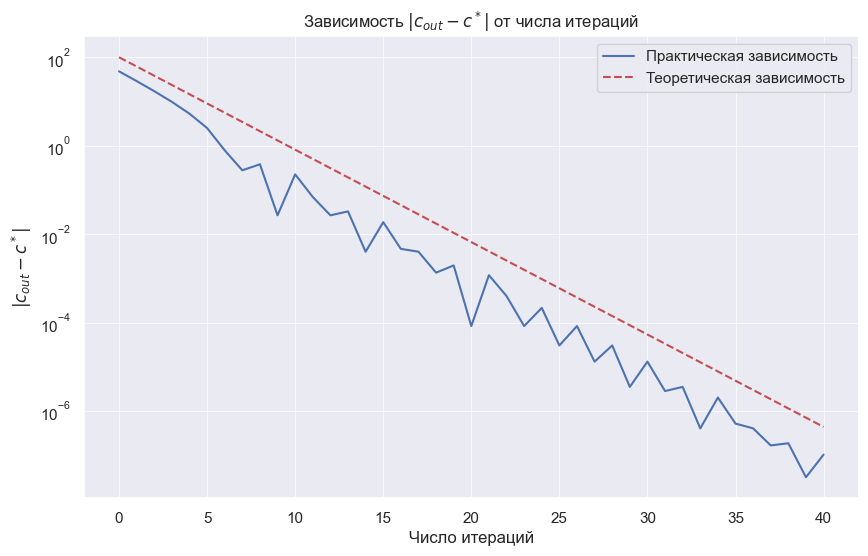

In [13]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 6])

    plt.plot(golden_abs_error, color="b", label="Практическая зависимость")
    plt.plot(
        [(b - a) / (tau**i) for i in range(0, len(golden_c))],
        linestyle="--",
        color="r",
        label="Теоретическая зависимость",
    )

    # Установим логарифмическую шкалу по оси Y
    plt.yscale("log")

    plt.xlabel("Число итераций")
    plt.ylabel(r"$|c_{out} - c^*|$")
    plt.title(r"Зависимость $|c_{out} - c^*|$ от числа итераций")

    plt.grid(True, linewidth=0.5)
    plt.legend()
    plt.show()

Практическая зависимость ниже, чем теоретическая, поскольку теоретическая зависимость основана на худших оценках. В реальных условиях алгоритм может сходиться быстрее, что может быть связано с особенностями конкретной функции, которую минимизируют.

Теоретическая оценка:

число вызовов оракула = $\log_{\tau}{\frac{b - a}{\varepsilon}}$

$\varepsilon = (b - a) / {\tau^{число \ вызывов \ оракула}}$

Визуализация зависимости $|c_{out} - c^*|$ от числа вызовов оракула 0го порядка

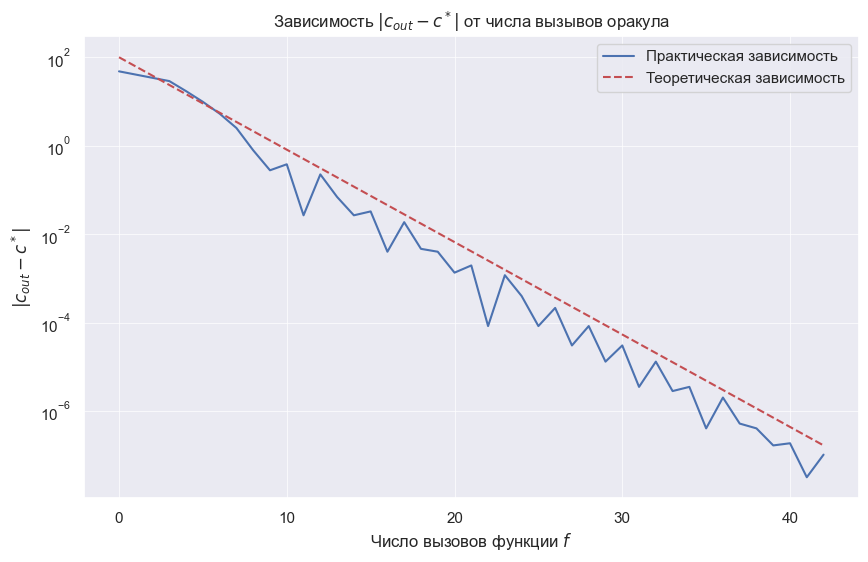

In [14]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 6])

    plt.plot(
        golden_oracle_call,
        golden_abs_error,
        color="b",
        label="Практическая зависимость",
    )
    plt.plot(
        golden_oracle_call,
        [(b - a) / tau ** i for i in golden_oracle_call],
        linestyle="--",
        color="r",
        label="Теоретическая зависимость",
    )

    # Установим логарифмическую шкалу по оси Y
    plt.yscale("log")

    plt.xlabel("Число вызовов функции $f$")
    plt.ylabel(r"$|c_{out} - c^*|$")
    plt.title(r"Зависимость $|c_{out} - c^*|$ от числа вызывов оракула")

    plt.grid(True, linewidth=0.5)
    plt.legend()
    plt.show()

Практическая зависимость практически не отличается от теоретической.

Метод золотого сечения, как и ожидалось, демонстрирует хорошую оракульную сложность и приемлемую итерационную сложность, без значительных отклонений от теоретических оценок.

__г). (0.5 балла)__ Объедините результаты сходимости двух методов на одном графике.

Визуализация зависимости $|c_{out} - c^*|$ от числа итерации

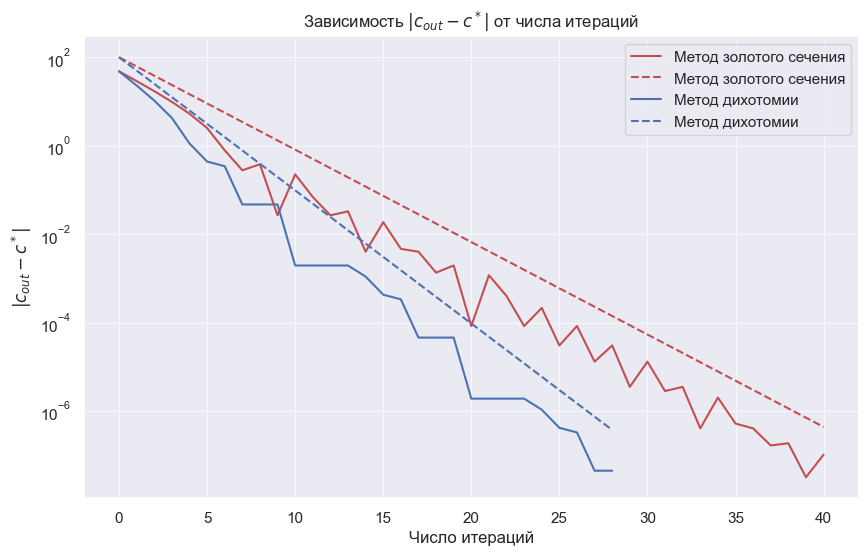

In [15]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 6])

    # Метод золотого сечения
    plt.plot(golden_abs_error, color="r", label="Метод золотого сечения")
    plt.plot(
        [(b - a) / (tau**i) for i in range(0, len(golden_c))],
        linestyle="--",
        color="r",
        label="Метод золотого сечения",
    )

    # Метод дихотомии
    plt.plot(dich_abs_error, color="b", label="Метод дихотомии")
    plt.plot(
        [(b - a) / (2**i) for i in range(0, len(dich_c))],
        linestyle="--",
        color="b",
        label="Метод дихотомии",
    )

    # Установим логарифмическую шкалу по оси Y
    plt.yscale("log")

    plt.xlabel("Число итераций")
    plt.ylabel(r"$|c_{out} - c^*|$")
    plt.title(r"Зависимость $|c_{out} - c^*|$ от числа итераций")

    plt.grid(True, linewidth=0.5)
    plt.legend()
    plt.show()

Как и ожидалось, метод дихотомии требует меньшее количество итераций для нахождения минимума по сравнению с методом золотого сечения. Это связано с тем, что на каждой итерации метод дихотомии сокращает интервал поиска в два раза, что приводит к более быстрому сужению области, содержащей минимум.

Визуализация зависимости $|c_{out} - c^*|$ от числа вызовов оракула 0го порядка

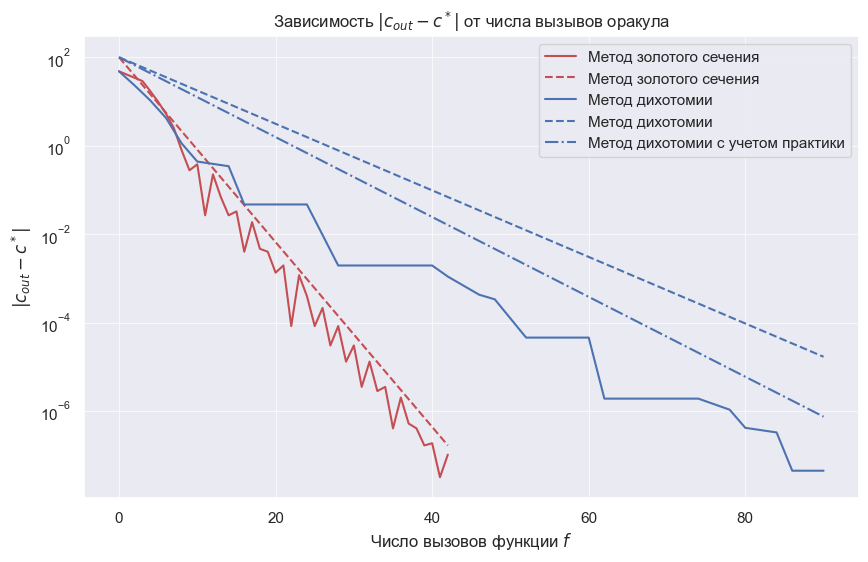

In [16]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=[10, 6])

    # Метод золотого сечения
    plt.plot(
        golden_oracle_call, golden_abs_error, color="r", label="Метод золотого сечения"
    )
    plt.plot(
        golden_oracle_call,
        [(b - a) / tau**i for i in golden_oracle_call],
        linestyle="--",
        color="r",
        label="Метод золотого сечения",
    )

    # Метод дихотомии
    plt.plot(dich_oracle_call, dich_abs_error, color="b", label="Метод дихотомии")
    plt.plot(
        dich_oracle_call,
        [(b - a) / 2 ** (i / 4) for i in dich_oracle_call],
        linestyle="--",
        color="b",
        label="Метод дихотомии",
    )
    plt.plot(
        dich_oracle_call,
        [(b - a) / 2 ** (i / (10 / 3)) for i in dich_oracle_call],
        linestyle="-.",
        color="b",
        label="Метод дихотомии с учетом практики",
    )

    # Установим логарифмическую шкалу по оси Y
    plt.yscale("log")

    plt.xlabel("Число вызовов функции $f$")
    plt.ylabel(r"$|c_{out} - c^*|$")
    plt.title(r"Зависимость $|c_{out} - c^*|$ от числа вызывов оракула")

    plt.grid(True, linewidth=0.5)
    plt.legend()
    plt.show()

- Как и ожидалось, метод золотого сечения выполняет значительно меньше оракульных вызовов по сравнению с методом дихотомии. Это объясняется тем, что в методе золотого сечения на каждой итерации вычисления значений функции частично переиспользуются, в то время как в методе дихотомии требуется больше вызовов оракула для определения нового интервала.

- Но также мы видим, что для метода дихитомии теоретическая зависимость с учетом практики предсказывает результаты лучше, чем стандартная теоретическая оценка. Это связано с тем, что в реальных условиях метод дихотомии использует меньше вызовов оракула на каждой итерации.

__д). (1 балла)__ Сделайте вывод об эффективности алгоритмов. Какой из них показал себя лучше/хуже на рассматриваемой функции? Какой из них на практике оказался ближе к теоретическим оценкам?

**__Вывод об эффективности алгоритмов__**:

1. **Метод дихотомии**:
   - **Лучше** по числу итераций. Как видно из графика зависимости от числа итераций, метод дихотомии сходится быстрее, то есть выполняет меньше шагов для достижения заданной точности.

   - **Оракульная сложность** у него **выше**, так как на каждой итерации выполняется больше вызовов функции, что делает его менее эффективным в плане затрат на вызов оракула.
   
2. **Метод золотого сечения**:
   - **Итерационная сложность** у метода золотого сечения выше, то есть требуется больше шагов для достижения точности, чем в методе дихотомии.
   
   - **Оракульная сложность** у метода золотого сечения **лучше**, так как он требует меньше вызовов оракула на каждом шаге. Это делает его более эффективным в реальных задачах, где вызов функции является дорогим по времени или ресурсам.

**__Вывод о поведении на практике__**:
   - На практике метод золотого сечения оказался ближе к теоретическим оценкам. Его поведение в плане числа вызовов функции практически совпадает с теоретически предсказанным результатом. Графики показывают, что метод золотого сечения демонстрирует стабильные отклонения, которые находятся близко к теоретическим зависимостям.

   - Метод дихотомии, с другой стороны, показывает более значительное расхождение между практическими результатами и теоретическими оценками, особенно в плане оракульной сложности.
   
**__Общий вывод__**:
- Если главной целью является **минимизация числа итераций**, то метод дихотомии показал себя лучше.

- Если же важнее **уменьшить число вызовов функции (оракула)**, то метод золотого сечения оказался более эффективным.